# Multivariate Regression Example

## Daniel Wilcox: 19147414

This example problem can be found within chapter 2 of the "Hands-on Machine Learning with Scikit-Learn and TensorFlow" by Aurélien Géron. 

It is assumed that the data-set is already downloaded on the device which can be found at: "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing" as a .csv file.  

The steps taken within this example are also found within chapter 2 and are as followed
### End-to-end Machine Learning Project Steps
1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

## 1) Look at the big picture

The task for this project is to use the California census data to build a model to predict the median housing prices in any California district.

The California census data has metrics such as; population, median income, median housing price, etc. for each distric.

### Framing the problem
The problem itself is framed to have the following properties:
   - Use __Supervised Learning__ as all the data provided will be labeled. 
   - Be a __Regression Task__ as we are attempting to predict values. Specifically this is a __Multivariate Regression Task__ since multiple features are used to make a prediction. 
   - Use __Batch Learning__ as the data is relatively small in size and there no contiuous data being put into the model.


### Import relavent libraries

In [ ]:
#Import all the libraries that will be used within this program.

#General imports for operating system, unzip and URL's
import os
import tarfile
from six.moves import urllib

#Dataframe and Data processing
import pandas as pd
from pandas.plotting import scatter_matrix

#Graphics
import matplotlib.pyplot as plt

#Array Manipulation
import numpy as np

#Shuffles data to test/train sets that represent the original data
from sklearn.model_selection import StratifiedShuffleSplit

#Fills in values to empty data locations
from sklearn.impute import SimpleImputer

#Encoding non-numerics into numerics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

#Creating custom Transformers
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer

#Scaling Dataframes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer

#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Cross-validation
from sklearn.model_selection import cross_val_score

#Model Tuning
from sklearn.model_selection import GridSearchCV



## 2) Get the data

In [2]:
#The online link to download the dataset is defined here:

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [3]:
#A function is define to download the dataset from the link defined above.

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    
    #If the dataset Path is not in the same directory, then make the path.
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        
    #If the dataset Path is in the same directory:
    tgz_path = os.path.join(housing_path, "housing.tgz")  #Add the "housing.tgz" file to the path
    urllib.request.urlretrieve(housing_url, tgz_path)     #
    housing_tgz = tarfile.open(tgz_path)                  #
    housing_tgz.extractall(path=housing_path)             #
    housing_tgz.close()                                   #

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

### Display imported data
This is to get a feel for how the data is stored. This will help later with regards to data processing in the next step.

In [5]:
House_Data = load_housing_data() #Uses the 'load_housing_data()' function to store the dataset in the variable
House_Data.head() #Display the top 5 rows of the dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Retrieve information on the data
By using the _.info()_ function, the information of the dataset is revealed. 

The _total_bedrooms_ attribute only contains __20433__ non-null values, while the rest of the attribute contain __20640__. This indicates that there are some districts are missing features.

In [6]:
House_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Describing the data
By using the _.describe()_ function, a numeric summary of the dataset is provided.


In [7]:
House_Data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Visualise the data

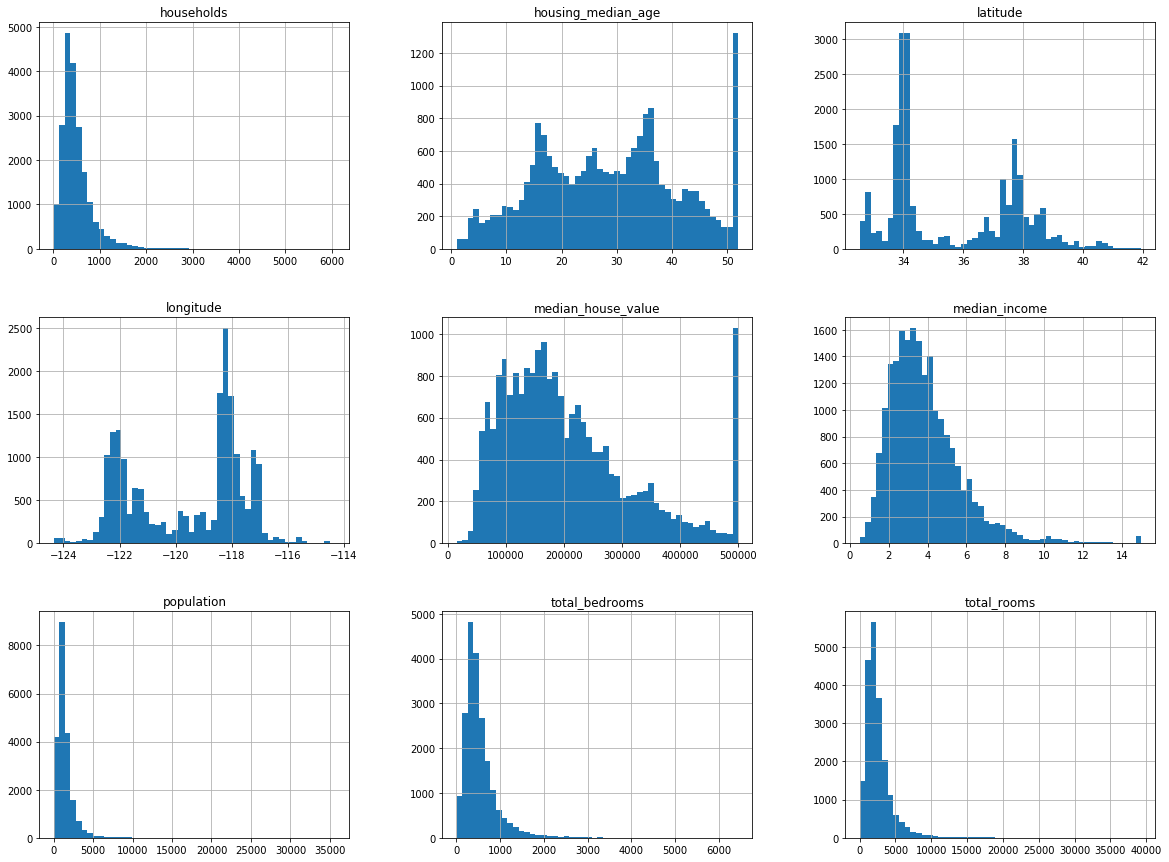

In [8]:
#%matplotlib inline is a magic fuction that defines "matplotlib" should display figures using the "Jupyter's" backend
%matplotlib inline

#Create a histogram for all the different attributes
House_Data.hist(bins=50, figsize=(20,15))
plt.show()

### General comments:

It should be noted that the data visulised within these histogram plots provide some important information about the dataset:

1) The median income is represented by US Dollars (USD). The data is found to be pre-processed to be capped between the range of 0.5 - 15 which represents 500 to 15 000 USD.

2) The _Median House Value_ and the _Housing Median Age_ was also capped.

3) The various attributes use different scales.

4) The hstograms are _tailed heavy_ which may cause problems for Machine Learning (ML) algorithms to predict in these regions. 

### Creating a test set

Creating a _test_ dataset allows the ML algoritm to be tested on data it's never seen before. Using the Scikit-Learn library, the _StratifiedShuffleSplit()_ function helps split the origonal data into a test set and training set. The _random_state_ variable within the funtion allows the dataset to be consistantly into the test/training set even if the code is re-run.

In [9]:

House_Data["income_cat"] = np.ceil(House_Data["median_income"] / 1.5)
House_Data["income_cat"].where(House_Data["income_cat"] < 5, 5.0, inplace=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=50)

for train_index, test_index in split.split(House_Data, House_Data["income_cat"]):
    strat_train_set = House_Data.loc[train_index]
    strat_test_set = House_Data.loc[test_index]

print("Training set: {} elements, Testing set: {} elements".format(len(strat_train_set),len(strat_test_set)))


Training set: 16512 elements, Testing set: 4128 elements


In [10]:
House_Data["income_cat"].value_counts() / len(House_Data)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [11]:
House_Data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [12]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

## 3) Discover and visualize the data to gain insights.

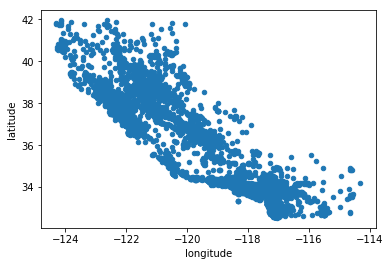

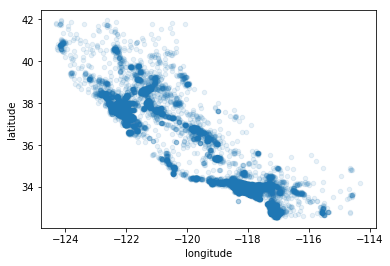

In [13]:
Testing_Data = strat_train_set.copy()

#Produce a scatter plot to visulise the data.
Testing_Data.plot(kind="scatter", x="longitude", y="latitude")

#The alpha variable shows where the data is more dense.
Testing_Data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

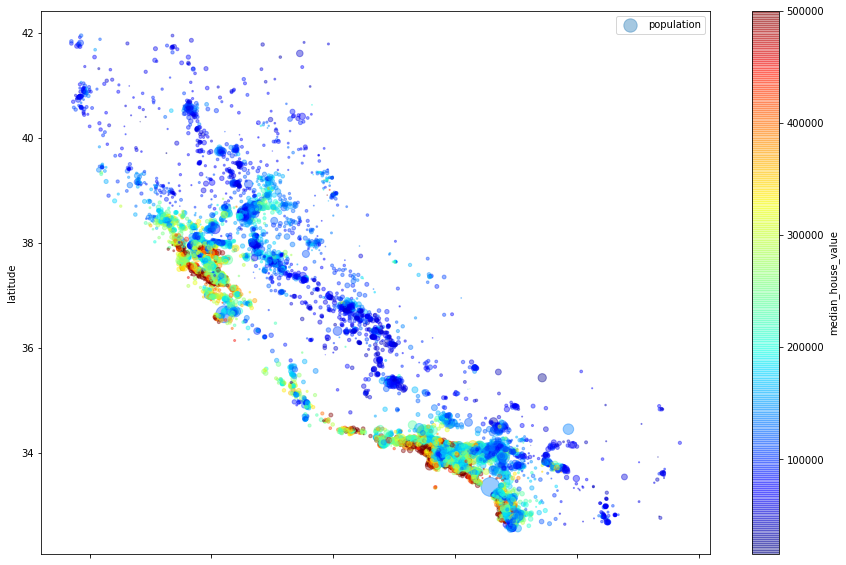

In [14]:
#Producing a heatmap scatterplot.
Testing_Data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=Testing_Data["population"]/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(15,10)
) 
plt.legend()

### Finding Correlations

In [15]:
corr_matrix = Testing_Data.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686930
total_rooms           0.137060
housing_median_age    0.103783
households            0.066502
total_bedrooms        0.052708
population           -0.024807
longitude            -0.048513
latitude             -0.140663
Name: median_house_value, dtype: float64

### Display Correlation Matrix
Using the top four correlated attributes, we display them as a correlation matrix.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18f20b00>,
      dtype=object)

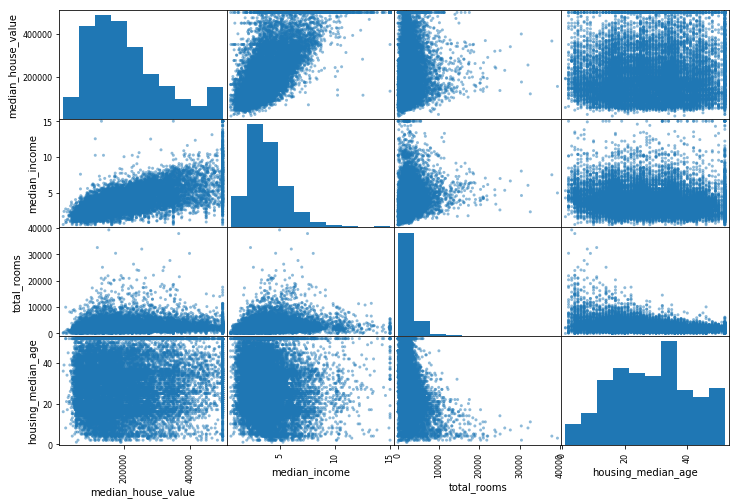

In [16]:
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(Testing_Data[attributes], figsize=(12, 8))

Visually (as well as from the _.corr()_ fuction), the most correlated attribute to "median_house_value" is "median_income". This can be seen closer in the following cell.

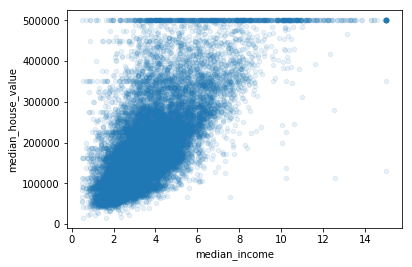

In [17]:
Testing_Data.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

In this figure, the "median_house_value" cap is clearly visible at 500000 USD. There also seems to be some other forms of "caps" as seen by the faint horizontal lines at 450000 USD and 350000 USD. These may need to be removed so that the ML algorithm doesn't reproduce these caps.

### Experimenting with Attribute Combinations
Some attributes can be created from other attributes which may help the ML algorithm make better predicitons. For example, the attribute "rooms_per_household" can be created from "total_rooms" and "households".

In [18]:
#Creating new columns in the dataset
Testing_Data["rooms_per_household"] = Testing_Data["total_rooms"]/Testing_Data["households"]
Testing_Data["bedrooms_per_room"] = Testing_Data["total_bedrooms"]/Testing_Data["total_rooms"]
Testing_Data["population_per_household"]=Testing_Data["population"]/Testing_Data["households"]

#Re-run the correlation matrix
corr_matrix = Testing_Data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.686930
rooms_per_household         0.151308
total_rooms                 0.137060
housing_median_age          0.103783
households                  0.066502
total_bedrooms              0.052708
population                 -0.024807
population_per_household   -0.027231
longitude                  -0.048513
latitude                   -0.140663
bedrooms_per_room          -0.255816
Name: median_house_value, dtype: float64

The new "rooms_per_household" attribute has more correlation with "median_house_value" than "total_rooms" or "total_bedrooms" did.

## 4) Prepare the data for Machine Learning algorithms
Firstly, the test set should be copied into two variables such that they contain predictors and labels.

In [19]:
#copying the predictors from test set, excluding the  "median_house_value"
House_Predictors = strat_train_set.drop("median_house_value", axis=1) 

#copying the labels from test set, i.e. the  "median_house_value"
House_labels = strat_train_set["median_house_value"].copy()


### Cleaning the Data
Most ML algorithms can't work with missing features, thus we need to make functions that can remove them. Note: we discovered earlier that the "total_rooms" had some data entries missing. This can be fixed by doing any of the following:

- Deleting the corisponding districts: using the .dropna()
- Deleting any of the attributes: using the .drop()
- Set the missing values to some value: using the .fillna()

Scikit-learn provides a function, _Imputer( )_, that takes care of missing values by using various methods. In this case we will use methond 3: _.fillna( )_

In [20]:
imputer = SimpleImputer(strategy="median")

#imputer can only be computed to numerical values, so "Ocean_proximity" needs to be removed.
House_fill = House_Predictors.drop("ocean_proximity", axis=1)
imputer.fit(House_fill)

#Median values of all the attributes:
imputer.statistics_
House_fill.median().values

array([-118.5   ,   34.26  ,   29.    , 2131.    ,  435.    , 1166.    ,
        410.    ,    3.5385])

In [21]:
#Copy the median of any attribute into the empty cell (note, currently stored as Numpy array)
X = imputer.transform(House_fill)

#Transform Numpy array to a Pandas Dataframe with same columns
House_Pr = pd.DataFrame(X, columns=House_fill.columns)

House_Pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


With _.info( )_, it is shown that all the attributes are the same size. Now we need to convert the "Ocean_proximity" attribute to a numeric value so that the ML algorithm can use it as an input. The _LabelEncoder( )_ will help assign a numeric value to each of the text values under "Ocean_proximity".

### Handling Text

In [22]:
#Create an instance of the LabelEncoder
encoder = LabelEncoder()

#Copy "ocean_proximity" column
housing_cat = House_Predictors["ocean_proximity"]

#Encode a numeric value to the colum
housing_cat_encoded = encoder.fit_transform(housing_cat)

#Display the label assosiated with the numeric value: [0, 1,..., n]
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


We could have also used "One Hot Encoding (__OHE__)". This is used as algorithms assosiate things that are near each other more alike. So instead of using a single column of values [0 -> 4] there can be multiple columns with either 1 or 0 assigned.

E.g. 1) A __OHE__ of "<1H OCEAN" will be a column of 1's for "<1H OCEAN" and 0's for everthing else.
E.g. 2) A __OHE__ of "<INLAND" will be a column of 1's for "INLAND" and 0's for everthing else.
This will be repeated for each catagory of "Ocean_proximity".

In [23]:
encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot


array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

### Custom Transformers
Creating custom transformers with classes will help automate processes. 

In [24]:
#Assign variables for the column location of specific attributes.
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

#Create class to automatically Combine Attributes
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    #Define: initiate, by default returns 'True'
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    #Define: Fit    
    def fit(self, X, y=None):
        return self # nothing else to do
    
    #Define: Transform, input - Dataframe, y is defaulted to 'None'
    def transform(self, X, y=None):
        
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix] #create attribute "rooms_per_household"
        population_per_household = X[:, population_ix] / X[:, household_ix] #create attribute "population_per_household"
        
        #if the value of "add_bedrooms_per_room" == 'True'
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix] #create attribute "bedrooms_per_room"
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room] # return original dataframe with new attributes 
        else:
            return np.c_[X, rooms_per_household, population_per_household] #Else, return original dataframe with new attributes (without "bedrooms_per_room")
            
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(House_Predictors.values)

### Feature Scaling
ML algorithms need to work with data that has been scaled the same. There are two methods of scaling all the attributes;
1) Min-max scaling: 
   -This is also known as _normalization_. This means that the data falls between 0 and 1. Scikit-Learn has the _MinMaxScaler_ function for this process.
   
2) Standardization:
   -This is done by subtracting all the values by the mean, then divides by the variance. This means that outliers dont have a huge effect when scaled this way. Scikit-Learn has the _StandardScaler_ function for this process.

In [25]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(House_fill)
House_fill.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17055,-122.25,37.47,35.0,3183.0,515.0,1313.0,487.0,5.9062
4004,-118.61,34.15,32.0,4491.0,815.0,1696.0,749.0,4.9102
3939,-118.58,34.21,27.0,2209.0,353.0,1034.0,344.0,4.7125
1669,-122.23,38.06,52.0,1350.0,266.0,490.0,257.0,3.1250
17938,-121.94,37.34,29.0,3377.0,853.0,1674.0,792.0,3.4233


### Transformation Pipelines
Scikit_learn provides the _Pipeline class_ to help sequence data transformations.

In [26]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [27]:
num_attribs = list(House_fill)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num_pipeline", num_pipeline, num_attribs),
        ("cat_pipeline", OneHotEncoder(), cat_attribs),
    ])
                        

In [28]:
housing_prepared = full_pipeline.fit_transform(House_Predictors)
housing_prepared

array([[-1.33712633,  0.86042624,  0.4984216 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.48076378, -0.69506988,  0.26038327, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.49574639, -0.6669585 , -0.1363473 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.55567683, -0.75129263,  0.81580606, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.94023051, -0.97618363, -2.04065401, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01865658,  0.61210909, -1.16784677, ...,  0.        ,
         0.        ,  0.        ]])

In [29]:
housing_prepared.shape

(16512, 16)

## 5) Select a model and train it.


### Linear Regression
As this is a regression problem, lets try a linear regression model.

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, House_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now to test the model with some instances from the Training set

In [31]:
some_data = House_Predictors.iloc[:5]
some_labels = House_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data_prepared))

print("\nLabels:\t\t", list(some_labels))



Predictions:	 [332783.25238628 294386.59172114 249811.8345387  221813.39796054
 254942.60502831]

Labels:		 [383200.0, 319100.0, 250900.0, 171100.0, 229300.0]


It can be seen from the previous output that the model is producing some outputs. Now we can test how accurate the model is preforming. This can be done using Root Mean Square Error (RMSE).

In [32]:
housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(House_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68391.80815533375

This result can be interpreted as the typical error of the prediction from the actual House's value. This does not seem to be a great predictor, so we can try another model.

### Decision Tree
This is a more complex model but more powerful than linear regression as it is capable of finding complex nonlinear
relationships in the data.

In [33]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, House_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [34]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(House_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

tree_rmse

0.0

This result of '0.0' is very surprising. This would mean that there is no error and thus fit perfectly to the data. It is more likely that the model has __overfit__ then data.

### Better Evaluation Using Cross-Validation
One way to evaluate the decision tree is to split the training set into a smaller training set and a validation set. 

Scikit-Learn implements a "K-fold cross-validation" option which randomly splits the training set into K distinct subsets (folds). Then the decision tree is trained and validated K-times by picking a different fold for evaluation every time and training on the other K-1 folds.

In [35]:
scores = cross_val_score(tree_reg, housing_prepared, House_labels,
        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:\t", scores)
    print("\nMean:", scores.mean())
    print("\nStandard deviation:", scores.std())

In [36]:
display_scores(tree_rmse_scores)    

Scores:	 [67596.3858434  68629.82647249 68485.28796492 69950.34322686
 69700.5697192  70803.53467015 68859.96451367 68782.98204719
 74476.74922076 68213.74958452]

Mean: 69549.9393263157

Standard deviation: 1862.0988951401066


Looking at the __Mean__ value, the _decision tree_ seems to have done worse than the _Linear Regression Model_. The standard deviation is only available because multiple training stages was done. Lets get the standard deviation of the _linear regression model_ to be consistant:

In [37]:
lin_scores = cross_val_score(lin_reg, housing_prepared, House_labels,
    scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:	 [67986.07910599 69211.27029414 73073.15864789 70211.66186109
 66160.53776491 66576.27202799 66560.50900159 66063.8352535
 72555.7722216  68400.3290653 ]

Mean: 68679.94252439916

Standard deviation: 2441.7074520633537


The _Decision Tree_ is still preforming worse than the _linear Regression model_. We can try one more model:

### Random Forest Regressor
_Random Forest Regressor_ trains many _Decision Trees_ on random subsets of the features. The predictions are then averaged out.

In [38]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, House_labels)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [39]:
housing_predictions = forest_reg.predict(housing_prepared)

forest_rmse = mean_squared_error(House_labels, housing_predictions)
forest_rmse = np.sqrt(forest_rmse)

forest_rmse

22102.509167067445

In [40]:
scores = cross_val_score(forest_reg, housing_prepared, House_labels,
        scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores:	 [51613.32667423 54032.9518695  53026.92929528 51498.99977385
 51518.37621085 52070.25443491 50172.15088814 53287.30717313
 54894.64686956 52262.46058431]

Mean: 52437.7403773756

Standard deviation: 1317.3755554200015


## 6) Fine-tune your model.
One can tune the hyperparameters manually until the model produces acceptable error levels, however, this can be laborious. 
### Grid Search
Scikit-Learn’s _GridSearchCV_ can automatically search for the best values for specified hyperparameters.


In [41]:
param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
        scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, House_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [42]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [43]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [44]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63436.04846443032 {'max_features': 2, 'n_estimators': 3}
55806.15986337658 {'max_features': 2, 'n_estimators': 10}
52585.53958035868 {'max_features': 2, 'n_estimators': 30}
60595.2839087207 {'max_features': 4, 'n_estimators': 3}
52862.38348613422 {'max_features': 4, 'n_estimators': 10}
49840.60223675838 {'max_features': 4, 'n_estimators': 30}
59744.9167240541 {'max_features': 6, 'n_estimators': 3}
51888.865499919615 {'max_features': 6, 'n_estimators': 10}
49584.82904195006 {'max_features': 6, 'n_estimators': 30}
58923.56329818272 {'max_features': 8, 'n_estimators': 3}
52150.030842774606 {'max_features': 8, 'n_estimators': 10}
50065.06944882888 {'max_features': 8, 'n_estimators': 30}
61319.475310127724 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53830.445776888264 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60427.468104214735 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52400.70961695427 {'bootstrap': False, 'max_features': 3, 'n_estimators':

It can be seen that whith max_features' = 6 and  'n_estimators' = 30, the prediction score is closest to the actual mean. This means that the model has been successfully tuned.

### Random Search
_GridSearchCV_ is only good when a few combonations are being explored, however, if the hyperparameter search space is large, _RandomizedSearchCV_ would be a better choice.

### Ensemble Methods
Tuning can also be done by combining different successful models.

### Analyse the Best Models and Their Errors
By analysing the models and how important each attribute is for making accurate predicitons.

In [45]:
feature_importances = grid_search.best_estimator_.feature_importances_

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3166701000721042, 'median_income'),
 (0.1483138364705965, 'INLAND'),
 (0.10858360628384275, 'pop_per_hhold'),
 (0.08427566535226208, 'bedrooms_per_room'),
 (0.08030553308532232, 'latitude'),
 (0.07663272802170812, 'longitude'),
 (0.05613153664021548, 'rooms_per_hhold'),
 (0.040583979901697494, 'housing_median_age'),
 (0.018041538209731242, 'population'),
 (0.016911589615824455, 'total_rooms'),
 (0.016803715296671476, 'total_bedrooms'),
 (0.016026437071586037, 'households'),
 (0.01120254407124547, '<1H OCEAN'),
 (0.004778405183937768, 'NEAR BAY'),
 (0.004550030439463412, 'NEAR OCEAN'),
 (0.0001887542837912429, 'ISLAND')]

It can be seen that only one "Ocean_proximity" catagory was useful so the rest could get dropped. 

### Evaluate Your System on the Test Set
Now the model is in it's final stages, the model can be compared with the testing set.

In [46]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

final_rmse

49317.91513998708

# Week 2 Exercises

__NOTE:__ Questions are stated at the beginning of each section. Highlighted words/phrases indicated useful information that was used to solve the problem.



## 1) Support Vector Machine

1. Try a __Support Vector Machine regressor__ (sklearn.svm.SVR), with various hyperparameters such as __kernel="linear"__ (with various values for the __C hyperparameter__) or __kernel="rbf"__ (with various values for the __C and gamma hyperparameters__). Don’t worry about what these hyperparameters mean for now. How does the best SVR predictor perform?




### References for Question 1:

__Grid Search:__
1. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

__Support Vector Regression:__
2. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
3. http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/svm/plot_svm_parameters_selection.html

In [47]:
#Importing Support Vector Regression (SVR) library
from sklearn.svm import SVR

##Creating an instance of the SVR 
Svm_model = SVR() 

__param_grid__:
- list of different parameters that the Gridsearch will explore _[ref 2.]_

__kernal__:
- used in _param grid_ _[ref 2.]_
- Specifies the kernel type to be used in the algorithm _[ref 2.]_
- It must be one of ‘linear’ or ‘rbf’ _[ref Question]_
- ‘linear’ must use the __C hyperparameter__ _[ref Question]_
- ‘rbf’ must use the __C and gamma hyperparameters__ _[ref Question]_

__C hyperparameter__ _[ref 2.]_
- Penalty parameter C of the error term
- Part of _param grid_
- Denoted by __'C'__
- float values

__gamma hyperparameter__ _[ref 2.]_
- Kernel coefficient for ‘rbf'
- Part of _param grid_
- Denoted by __'gamma'__ 
- float values


The structure of _GridSearchCV_ requires _[ref 1.]_;
1. Estimator = 'Model to be scored with'
2. param_grid = 'Options to permiate through'
3. cv = ’cross validation [using NMSE as before]’, 
4. verbose = 'Controls the verbosity: the higher, the more messages"
5. n_jobs = 'Number of jobs to run in parallel.’

In [48]:
#Both hyperparameters are increasing multiples of 10, [ref 3.]

param_grid = [
        {'kernel': ['linear'], 'C': [10., 20., 100., 200., 1000., 2000., 10000., 20000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 2.0, 10., 20., 100., 200., 1000.0],
         'gamma': [0.01, 0.02, 0.1, 0.2, 1.0, 2.0]},
    ]

grid_search = GridSearchCV(Svm_model, param_grid, cv=5, scoring='neg_mean_squared_error',verbose=2, n_jobs=4)

In [49]:
grid_search.fit(housing_prepared, House_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 11.0min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 18.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid=[{'kernel': ['linear'], 'C': [10.0, 20.0, 100.0, 200.0, 1000.0, 2000.0, 10000.0, 20000.0]}, {'kernel': ['rbf'], 'C': [1.0, 2.0, 10.0, 20.0, 100.0, 200.0, 1000.0], 'gamma': [0.01, 0.02, 0.1, 0.2, 1.0, 2.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

The best parameters were found to be:

In [50]:
grid_search.best_params_

{'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}

As done before, calculating the RMSE of the best model:

In [51]:
neg_rmse = grid_search.best_score_
rmse = np.sqrt(-neg_rmse)
rmse

71759.41253228315

__General Comments__
- The score is worse when compared to _RandomForestRegressor_ with the _Grid search_.
- Value of 'C' is the maximum.
- The 'linear' kernal did better than the 'rbf' kernal.
- Evaluated using 5-fold cross validation

## 2) Randomized Search

2. Try replacing GridSearchCV with __RandomizedSearchCV__.

### References for Question 2:

__Random Search:__
4. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

5. https://adventuresindatascience.wordpress.com/2017/10/26/picking-regularization-parameters-the-easy-way/

6.https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb


In [52]:
#Import "RandomizedSearchCV" library [ref 4.]
from sklearn.model_selection import RandomizedSearchCV

#Import reciprocal/expon for random values [ref 6.]
from scipy.stats import reciprocal, expon

param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }



__param_distributions__:
- Similar to para_grid _[ref 4.]_

__kernal__:
-‘linear’ either ‘rbf’ as before _[ref Question]_

__reciprocal__:
- used to generate random numbers


In [53]:
Rand_search = RandomizedSearchCV(Svm_model, param_distributions=param_distribs, n_iter=50, cv=5, 
                                 scoring='neg_mean_squared_error',verbose=2, n_jobs=4, random_state=50)

Rand_search.fit(housing_prepared, House_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 17.4min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 25.8min finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=4,
          param_distributions={'kernel': ['linear', 'rbf'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1ada9518>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a184e0e48>},
          pre_dispatch='2*n_jobs', random_state=50, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

The best parameters were found to be:

In [54]:
Rand_search.best_params_

{'C': 110887.18087668132, 'gamma': 0.21115499390841086, 'kernel': 'rbf'}

RMSE of the best model:

In [55]:
neg_rmse = Rand_search.best_score_
rmse = np.sqrt(-neg_rmse)
rmse

55137.18655357743

__General comments__

## 3) Transformer in Pipeline

3. Try adding a __transformer__ in the __preparation pipeline__ to select only the most __important attributes__.

### References for Question 3:

__Array sorting:__
7. https://stackoverflow.com/questions/34226400/find-the-index-of-the-k-smallest-values-of-a-numpy-array



In [56]:
#We want to keep the top 'A' important features. Previously, "feature_importances" was created. 

#Create a function that finds the index of the top 'A' attributes. [ref 7.]
def Best_Attributes_Index(X, A):
    Top_index = np.argpartition(np.array(X), -A)[-A:]
    sorted_X = np.sort(Top_index)
    return sorted_X


In [57]:
#As in the book example:

from sklearn.base import BaseEstimator, TransformerMixin

class BestAttributes(BaseEstimator, TransformerMixin):
    
    def __init__(self, feature_importances, A):
        self.feature_importances = feature_importances
        self.A = A
        
    def fit(self, X, y=None):
        self.feature_indices_ = Best_Attributes_Index(self.feature_importances, self.A)
        return self
    
    def transform(self, X):
        return X[:, self.feature_indices_]
    

In [58]:
#keeping the top 3 features
A = 3

Best_index = Best_Attributes_Index(feature_importances, A)
Best_index



array([ 7,  9, 12])

The top 'A' attributes have been found, who's labels are:

In [59]:
np.array(attributes)[Best_index]



array(['median_income', 'pop_per_hhold', 'INLAND'], dtype='<U18')

Now that the top attributes can be found, the transformer pipeline can be made.

In [60]:
#Using the example from the book to make a pipeline. 

Top_Attribute_Pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('Best_Attributes', BestAttributes(feature_importances, A))
])


The new pipeline has been made, now it needs to be tested to see if it works as intended

In [61]:
Top_A_Data = Top_Attribute_Pipeline.fit_transform(House_Predictors)
Top_A_Data[0:2] 

array([[ 1.0751713 , -0.03424336,  0.        ],
       [ 0.5497921 , -0.07374466,  0.        ]])

In [62]:
housing_prepared[0:2, Best_index]

array([[ 1.0751713 , -0.03424336,  0.        ],
       [ 0.5497921 , -0.07374466,  0.        ]])

Top_A_Data: This data was transformed using the Pipeline
housing_prepared: This data just used best index to check that the pipeline worked

They look the same so we can conclude that the pipeline works

## 4) Single Pipeline

4. Try creating a __single pipeline__ that does the full data preparation __plus the final prediction__.

### References for Question 4:

__SVR:__
_[ref 2]_: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html



### References for Question 4:

__Array sorting:__
7. 



In [69]:
#Using "Top_Attribute_Pipeline" Pipeline as a template 

#Assuming that the model to be generated is still the SVR from Question 1 
#and the best parameters found from Question 3

Single_Pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', BestAttributes(feature_importances, A)),
    ('svm_model', SVR(**Rand_search.best_params_))
])


#House_labels = strat_train_set["median_house_value"].copy()



In [70]:
Single_Pipeline.fit(House_Predictors, House_labels)

Pipeline(memory=None,
     steps=[('preparation', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num_pipeline', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median... gamma=0.21115499390841086, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

A quick test to see whether the pipeline is working as intended:

In [77]:
#Similar test to that in the previous Question:


#Using model to predict the first 3 rows
print("Model Prediction:\t{}".format( Single_Pipeline.predict(House_Predictors.iloc[:3]))) 

#Only showing the first 3 rows
print("Actual Labels:\t\t{}".format(list(House_labels.iloc[:3])))





Model Prediction:	[189761.27336687 692155.49903492 174236.35927508]
Actual Labels:		[383200.0, 319100.0, 250900.0]


__General Comments:__
- Total_Pipeline works 
- Predicitons aren't accurate
- could try another model (_RandomForestRegressor_ did better earlier)

## 5) Single Pipeline

5. __Automatically__ explore some __preparation options__ using __GridSearchCV__.

### References for Question 5:

__GridSearchCV__: 
- _[ref 1.]_: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

__Imputer Options__:
- [ref book]



The question asks for __preparation options__ to be generated __Automatically__ for __GridSearchCV__.

The structure of _GridSearchCV_ requires _[ref 1.]_;
1. Estimator = 'Model to be scored with'
2. param_grid = 'Options to permiate through'
3. cv = ’cross validation [using NMSE as before]’,
4. scoring = 'method of scoring model [using NMSE as before]'
5. verbose = 'Controls the verbosity: the higher, the more messages"
6. n_jobs = 'Number of jobs to run in parallel.’

We can fill the following for _GridSearchCV_;
1. Estimator = Automatic Pipeline "Single_Pipleline"
2. param_grid = ??
3. cv = 5 (split into 5 folds), 
4. scoring = 'neg_mean_squared_error'
5. verbose = 2 (as default from previous example)
6. n_jobs = 4 as default from previous example)


This means the only parameter that needs to be determined is the _param_grid_. Since _GridSearchCV_ permiates various hyperparameter options, we need to find these options.
- Top 'A' attributes can be changed
- _Imputer_'s options can be changed


In [102]:
House_x = strat_train_set.drop("median_house_value", axis=1) 
House_y = strat_train_set["median_house_value"].copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17055 to 2387
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16350 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


dict_keys(['memory', 'steps', 'preparation', 'feature_selection', 'svm_model', 'preparation__n_jobs', 'preparation__remainder', 'preparation__sparse_threshold', 'preparation__transformer_weights', 'preparation__transformers', 'preparation__num_pipeline', 'preparation__cat_pipeline', 'preparation__num_pipeline__memory', 'preparation__num_pipeline__steps', 'preparation__num_pipeline__imputer', 'preparation__num_pipeline__attribs_adder', 'preparation__num_pipeline__std_scaler', 'preparation__num_pipeline__imputer__copy', 'preparation__num_pipeline__imputer__fill_value', 'preparation__num_pipeline__imputer__missing_values', 'preparation__num_pipeline__imputer__strategy', 'preparation__num_pipeline__imputer__verbose', 'preparation__num_pipeline__attribs_adder__add_bedrooms_per_room', 'preparation__num_pipeline__std_scaler__copy', 'preparation__num_pipeline__std_scaler__with_mean', 'preparation__num_pipeline__std_scaler__with_std', 'preparation__cat_pipeline__categorical_features', 'preparat

In [103]:
#Creating the param_grid

#Other Imputer options
#'A' varies between 1 and total number of features 
param_grid = [{
    'preparation__num_pipeline__imputer__strategy': ['median', 'mean', 'most_frequent'], 
    'feature_selection__A': list(range(1, len(feature_importances) + 1)) 
}]

Auto_Grid_Search = GridSearchCV(Single_Pipeline, param_grid, cv=5, 
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=4)

Auto_Grid_Search.fit(House_x, House_y)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 10.0min


KeyboardInterrupt: 

The best parameters for the _GridSearchCV_ were found to be:

In [ ]:
Auto_Grid_Search.best_params_

__General Comments__:
